## 데이터 분석 목표 
##### >>> 고객을  다양한 기준을 통해 고객을 분류해 고객마다의 특성에 맞게 서비스를 제공하기 위한  고객 분류 
### RFM 기법
   ##### 고객 분석 요소
  - ###### 1. recency = 최신 , 2. frequency = (빈도)최근 구매 횟수 , 3. monetary  = 총 구매 금액의 약자들의 알아내는 기법

## 고객 세그먼테이션 군집화
- 비지도 학습 (크러스터링 활용)

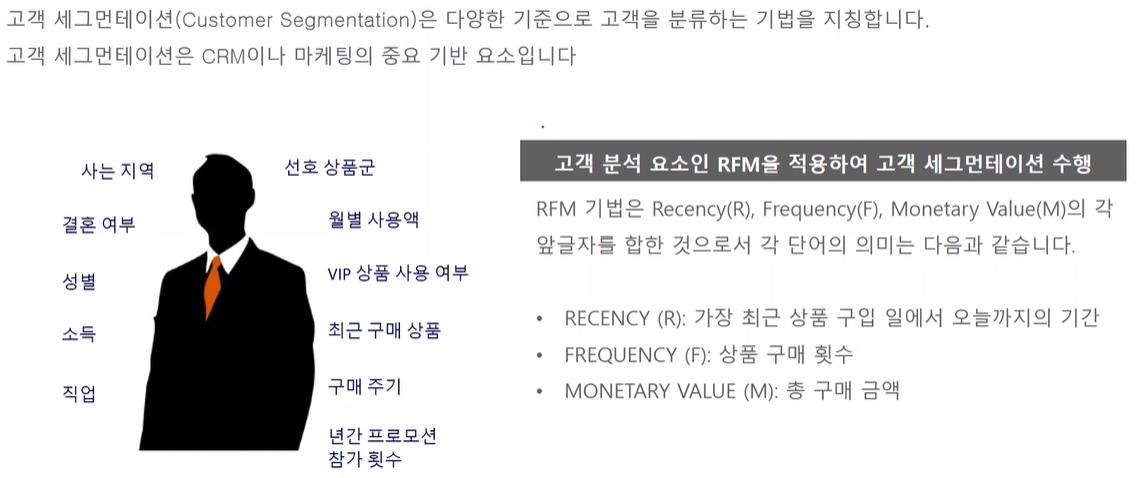

- ### recency = 최신
- ### frequency = (빈도)최근 구매 횟수
- ### monetary value = 총 구매 금액

## 컬럼별 설명
- ### InvoiceNo    = 주문번호  _ c로 시작하는 것은 취소주문이다.
- ### StockCode    = 제품코드
- ### Description  = 제품 설명
- ### Quantity     = 주문 제품 건수
- ### InvoiceDate  = 주문 일자
- ### UnitPrice    = 제품 단가
- ### CustomerID   = 고객 번호
- ### Country      = 국가명(주문고객의 국적)


### 이 데이터 셋은 target값이 없으므로 비지도학습으로 학습시켜야 한다.


In [7]:
import pandas as pd
df=pd.read_excel(io='Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### 데이터 컬럼병 형식 확인

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### 널값과 오류 데이터 를 지워보자
### Quantity       UnitPrice    CustomerID 은 널값이 많다.
### 불린 인덱싱을 적용해 Quantity > 0 ,UnitPrice > 0 이고 CustomerID가 NOTNULL인것만 다시 필터링 한다.

- null 제거 : 특히 CustomerID의 널값이 매우 많다. 고객 시그먼테이션을 수행하기 때문에 고객식별번호가 없는 데이터는 필요하지 않다.-
- 오류 제거 : 삭제할 부분은 Description ,UnitPrice 의 값이 0보다 작은 값 (EX)-10) 같은 값들을 모두 삭제한다.
    

In [9]:
df= df[df['Quantity'] > 0]
df= df[df['UnitPrice'] > 0]
df=df[df['CustomerID'].notnull()]
print(df.shape)
df.isnull().sum()

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

- #### 널값이 사라진것을 볼수 있다.
- #### 데이터의 행의 수가 541909개에서 397884으로 준것을 알수 있다. 

### 이제 top5 국가별 사용 빈도수를 알아보도록 합시다.


In [12]:
df['Country'].value_counts()[:5]

United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Name: Country, dtype: int64

- #### 영국이 가장 만은 비율을 차지하고 있다. 영국의 쇼핑몰이기 때문

### 영국이 대다수를 차지하므로 영국을 제외한 다른 나라들의 데이터를 지워보도록 하겠습니다.

In [13]:
df= df[df['Country']=='United Kingdom']
print(df.shape)

(354321, 8)


- #### 데이터의 행 수가 397884에서 354321으로 줄어든것을 알수있습니다.

### 데이터 컬럼별 데이터형확인
- InvoiceNo  StockCode   Description   Country은 문자형이기 때문에 숫자로 되있는 컬러은 int64로 바꿔준다.       

In [15]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 354321 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354321 non-null  object        
 1   StockCode    354321 non-null  object        
 2   Description  354321 non-null  object        
 3   Quantity     354321 non-null  int64         
 4   InvoiceDate  354321 non-null  datetime64[ns]
 5   UnitPrice    354321 non-null  float64       
 6   CustomerID   354321 non-null  float64       
 7   Country      354321 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB
None


### RFM 기반 데이터 가공 
 - 고객 세그먼테이션 군집화를 RFM 기반으로 수행 
 - RFM 기법으로 하기 때문에 주문 금액, 횟수 날짜 컬럼만 이용한다.
 - 먼저 UnitPrice * Quantity 을 곱해서 주문 금액 데이터를 만든다.    제품 단가 * 주문제품 건수
 - float형을 int로 변환

In [18]:
#제품 건수와 단가를 곱해 sale_mount컬럼에 반환
df['sale_mount']= df['Quantity'] *df['UnitPrice']

# id가 실수일수는 없기 때문에 int로 변경
df['CustomerID']= df['CustomerID'].astype(int)

C:\Users\82105\AppData\Local\Temp\ipykernel_23828\2397558935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sale_mount']= df['Quantity'] *df['UnitPrice']
C:\Users\82105\AppData\Local\Temp\ipykernel_23828\2397558935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID']= df['CustomerID'].astype(int)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354321 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354321 non-null  object        
 1   StockCode    354321 non-null  object        
 2   Description  354321 non-null  object        
 3   Quantity     354321 non-null  int64         
 4   InvoiceDate  354321 non-null  datetime64[ns]
 5   UnitPrice    354321 non-null  float64       
 6   CustomerID   354321 non-null  int32         
 7   Country      354321 non-null  object        
 8   sale_mount   354321 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 25.7+ MB


### top 5 주문 건수와0 주문 금액을 가진 고객 데이터를 조회해볼게요
- #### 데이터가 주문횟수와 주문 금액이 압도적으로 특정 고객에게 많은 특성을 가지고 있습니다.
- #### 개인 고객의 주문과 소매점의 주문이 함께 포함되어 있기 때문입니다.



In [24]:
# id별(가장많이 주문한사람) 주문 건수top 5
print(df['CustomerID'].value_counts().head(5))

# 가장 많은 금액을 사용한 고객
print(df.groupby('CustomerID')['sale_mount'].sum().sort_values(ascending=False)[:5])


17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: CustomerID, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_mount, dtype: float64


- ### >>> 주문횟수가 많다고 금액이 가장 높은 것은 아니기 떄문
- ### >>> 몇몇 특정 고객이 많은 주문 건수와 주문 금액을 가지고 있다.


### 주문 번호(invoiceNO) + 상품코드(stockcode) 레벨의 식별자로 되어있다.
- #### invoiceNO 와 stockcode를 그룹바이 하면 거의 1에 가깝게 서로 1대1 관계를 알수 있다.

In [27]:
df.groupby(['InvoiceNo','StockCode'])['InvoiceNo'].count().mean()

1.028702077315023

1. ### rfm 기반의 고객 세그먼테이션은 고객 레벨로 주문 기간 , 주무횟수 , 주문 금액 데이터를 기반으로 세그먼테이션을 진행하려 한다.
2. ### 이제 주문 번호 + 상품 코드 기준의 데이터를 고객 기준의 recency = 최신 , frequency = (빈도)최근 구매 횟수 , monetary value = 총 구매 금액 컬럼을 가진 데이터로 변경하려 한다.
### 이를 위해 주문 번호 기준의 데이터를 개별 고객기준의 데이터로 groupby 해애 한다


-  agg 함수 설명
#### agg 사용 - count나 max를 한번에 수행하기 어렵기 때문에 agg에 대상컬럼들과 aggregation 함수명들을 딕셔너리 형태로 입력하면 
#### 컬럼 여러개의 서로 다른 aggregation 연산을 할수 있다.



In [37]:
# 데이터프레임의 groupby의 multiple 연산을 통해 agg()이용
# recency는


aggregations= {'InvoiceDate':'max',
              'InvoiceNo':'count',
              'sale_mount':'sum'}

cust_df = df.groupby('CustomerID').agg(aggregations)
cust_df


,InvoiceDate,InvoiceNo,sale_mount
CustomerID,,,
12346,2011-01-18 10:01:00,1,77183.60
12747,2011-12-07 14:34:00,103,4196.01
12748,2011-12-09 12:20:00,4595,33719.73
12749,2011-12-06 09:56:00,199,4090.88
12820,2011-12-06 15:12:00,59,942.34
...,...,...,...
18280,2011-03-07 09:52:00,10,180.60
18281,2011-06-12 10:53:00,7,80.82
18282,2011-12-02 11:43:00,12,178.05


In [38]:
# group화된 결과 칼럼 값을 recency = 최신 , frequency = (빈도)최근 구매 횟수 , monetary 으로 변경
# recency는InvoiceDate 칼럼의 max에서 데이터 가공
# frequency는 InvoiceDate 컬럼에서 count()
# monetary는 sale_mount에서 sum()



cust_df=cust_df.rename(columns={'InvoiceDate':'recency',
              'InvoiceNo':'frequency',
              'sale_mount':'monetary'})

cust_df=cust_df.reset_index()
cust_df.head(3)

,CustomerID,recency,frequency,monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


In [43]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   CustomerID  3920 non-null   int64         
 1   recency     3920 non-null   datetime64[ns]
 2   frequency   3920 non-null   int64         
 3   monetary    3920 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 122.6 KB


### recency컬럼은 구매 날짜가 나타낸컬럼으로 개별 고객당 얼마나 최근에 구매 했는지 알려주는 컬럼이다
- ### 하지만 아직 데이터 가공이 안되서 년 월 일 날짜로 되어있다.
- ### 그래서 이컬럼을 구매 1일 차은 1 , 구매 1년된날은 365로 표시 할려고 한다.


In [45]:
import datetime as dt

# datetime(2011,12,10)는 오늘 날짜로 해야하지만 데이터 셋의 가장 마지막 날이 2011.12.10이므로 이러게 날짜를 정하였다,
cust_df['recency'] = dt.datetime(2011,12,10) - cust_df['recency']  # 오늘 날짜  - 구매 날짜
cust_df['recency']= cust_df['recency'].apply(lambda x : x.days + 1)

#오류는 한번 실행했는데 또 해서 그럼 신경 ㄴㄴㄴ

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [48]:
print('cust_df 로우와 컬럼의 건수는 ',cust_df.shape)
cust_df.head(3)

cust_df 로우와 컬럼의 건수는  (3920, 4)


,CustomerID,recency,frequency,monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


- ### >>> recency컬럼의 1인  구매 1일경과 2는 2일 경과 , 326은 326일 경과된 뜻이다. 

## 군집화 전 칼럼별 히스토그램 확인하기
 - ### 데이터셋은 소매업체의 대규모 주문을 포함하고 있다.
 - ### 이로 인한 개인 주문과 업체 주문의 차이가 매우 크다
 - ### 이대로 군집화를 실행 시키면 한쪽으로만 군집하는 현상이 발생된다.
 - ### 우리는 개인 고객의 주문의 데이터를 분석하려 한다.ㄷ


(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <BarContainer object of 10 artists>)

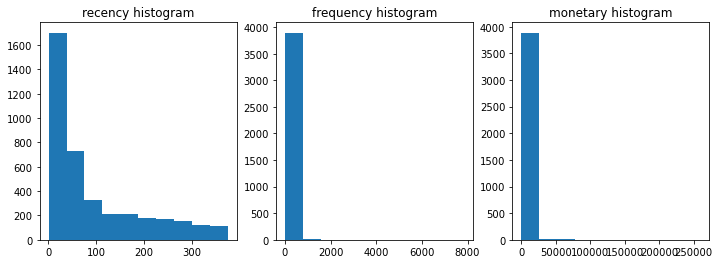

In [57]:
# 한쪽으로 쏠린 데이터를 히스토그램화 하면 알수있는 현상을 알아보자
from matplotlib import pyplot as plt
%matplotlib inline
fig , (ax1, ax2, ax3) = plt.subplots(figsize = (12,4),nrows=1, ncols = 3)
ax1.set_title('recency histogram')
ax1.hist(cust_df['recency'])

ax2.set_title('frequency histogram')
ax2.hist(cust_df['frequency'])

ax3.set_title('monetary histogram')
ax3.hist(cust_df['monetary'])

- #### 세개 히스토그램 모두 왜곡된 분포도를 보여준다.
- #### 특히 recency값은 특저 범위에 몰려있기 때문에 왜곡 전도가 아주 싶하다고 볼수 있다.


### 각 컬럼의 데이터 값 백분위로 대략적으로 어떻게 값이 몰렸는지 알아보자
- describe()

In [58]:
cust_df[['recency','frequency','monetary']].describe()


# recency평균은 92% 지만 50%가  21보다 크다는 것을 알수 있다.
# 또 max값은 374로 75%인 143보다 훨씬 커서 왜곡 정도가 아주 크다고 볼수 있다
# 모든 컬럼의 MAX값이 이상치를 나타내고 있다 

,recency,frequency,monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


- #### 왜곡이 심한 데이터셋에 KMeans 을 적용하면 중심의 객수를 증가시키더라도 변별력이 떨어지는 군집화를 나타낸디

### 그래서 데이터 셋을 standartScaler로 평균과 표준편차를 재조정한 뒤에 k-means를 수행해보자.

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
X_features = cust_df[['recency','frequency','monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans =KMeans(n_clusters=3, random_state=0)
labels =kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] =labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

- ### 군집회를 3개로 진행시켜보니(n_clusters =3) 전체 군집의 평균 실루엣 계수인 실루엣 스코어는 0.592로 안정적인 수치가 나왔습니다.
- ### 0.5이상이면 좋다

실루엣 스코어는 : 0.592


### 각 군집별 실루엣 계수값은 어떻게 될까요??
 - 위에서는 한번에 군집 갯수를 잘 정한것이지 다른 데이터에서 쓸려면 밑에 처럼 확인하는 것이 좋다.

### 실루엣 계수 시각화 함수

In [70]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
import numpy as np
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")


### 군집갯수별 시각화 함수

In [72]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

## 함수들을 이용해 실루엣 계수, 군집별 갯수 시각화
 - ## LOG1P()를 하기 전인 데이터로 실루엣 계수, 군집별 갯수시각화

C:\Users\82105\AppData\Local\Temp\ipykernel_23828\3186299039.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
C:\Users\82105\AppData\Local\Temp\ipykernel_23828\3186299039.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\


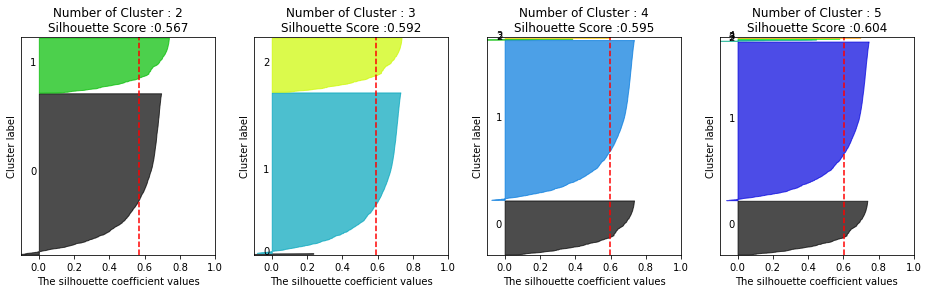

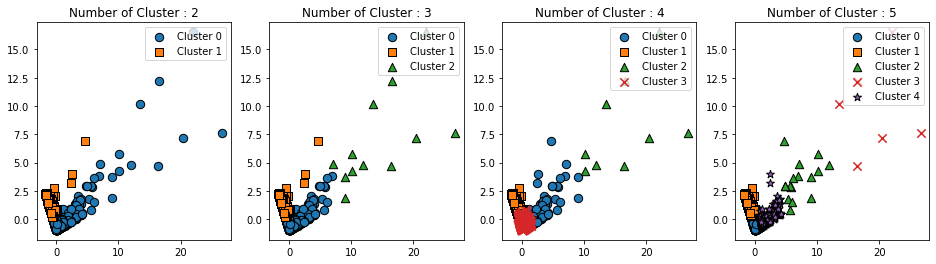

In [73]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

- ### 실루엣 계수 모든 그래프는 -값을 나타내고 있기에 잘못된  군집화다.
- ### 군집갯수별 그래프에서는 한쪽으로 매우 치우쳐진 그래프이다. 

## 데이터에 LOG1P()를 적용 후  실루엣 계수, 군집별 갯수시각화
### 데이터 왜곡의 정도를 낮추기 위해 가장 자주 사용되는 방법은 데이터 값에 로그(LOG)를 적용는 로그변환입니다.
- #### 데이터셋의 왜곡 정도를 낮추기 위해 전체데이터를 로그 변화하여 K-Means을 적용해 결과를 비교해보자

In [74]:
# recency  frequency  monetary 컬럼에 np.log1p()로 log transformation
cust_df['recency_log']= np.log1p(cust_df['recency'])
cust_df['frequency_log']= np.log1p(cust_df['frequency'])
cust_df['monetary_log'] = np.log1p(cust_df['monetary'])


#
X_features = cust_df[['recency_log','frequency_log','monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)


kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)

cust_df['cluster_label'] = labels

print('실루엣 계수 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 계수 스코어는 : 0.303


##### >>>실루엣 스코어에 대한 결과
- #### LOG1P 실루엣 계수는 더떨어지지만 실루엣 스코어의 절대치가 중요한것은 아니다
- #### 어떻게 개별 군집이 더 균일하게 나뉠수 있는지가 더중요하기 때문이다.

### 로그 변환한 데이터를 기반으로 실루엣 계수와 군집화 구성을 시각화 해보자



C:\Users\82105\AppData\Local\Temp\ipykernel_23828\3186299039.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
C:\Users\82105\AppData\Local\Temp\ipykernel_23828\3186299039.py:36: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\


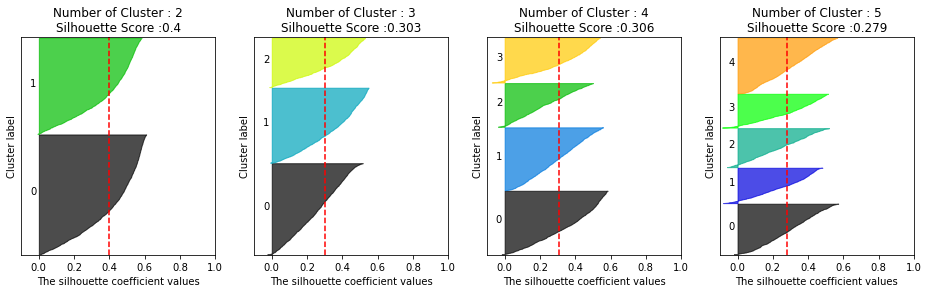

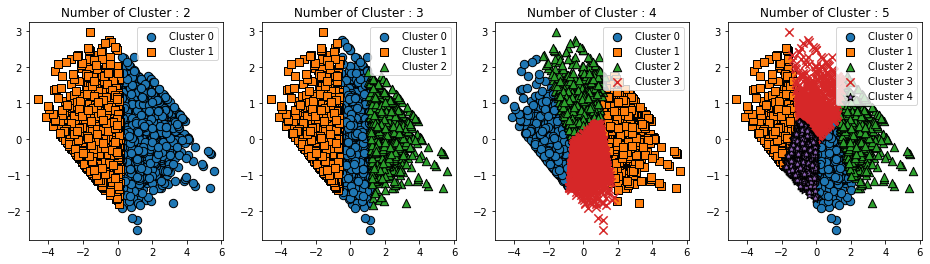

In [75]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

##### >>> 결과

- #### 실루엣 스코어는 LOG변환전보더 더 떨어졌지만 앞의 경우보다 더 균일하게 군집화 되었음을 알수 있다, 
- #### 이처럼 왜곡된 데이터 셋에 대해서는 로그변환으로 데이터를 일차 변환 후 군집화를 수행하면 더 나은 결과를 도출 할수 있다.

### >>>전체 정리
#### 01. 각 군집화 기법들은 장/단점을 가지고 있다.
#### 02. 군집화를 하기 위해서는 군집화 하려는 데이터의 특성에 맞게 선택해야 합니다.
1. kmeans의 경우 
   - 거리기반으로 군집 중심점을 이동시키며 
     군집화를 수행하여 매우 직관적인 장점을 가지고 있으나, 
     복잡한 구조의 데이터에서는 적용 한계와 군집의 개수 최적화에 어려움을 가진다.
     kmeans의 평균은 군집이 잘 되었는지 평가를 하기위한 실루엣 계수를 이용해야 한다.
####     
2. 평균이동(means shift)의 경우
   - kmeans와 유사하지만 거리기반이 아닌 데이터가 모여 있는 밀도가 가장 높은 쪾으로 군집 중심점을 이동하면서 군집화 한다.
     정형 데이터셋보다는 이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적하는데 높은 성능을 보인다.
####     
3. GMM의 경우 
   - 군집화를 적용하고자 하는 데이터가 여러개의 가우시안 분포를 모델에 섞어서 생성된 모델로 가정해 수행하는 방식이다.
     전체 데이터에서  서로 다른 정규 분포 형태를 추출해 다른 정규 분포를 가진 데이터를 각각 군집화 하는 것이다.
     GMM의 경우 Kmeans 보다 유연하게 다양한 데이터에 적용할수 있다.
#### 
4. DBSCAN의 경우
   - 밀도 기반 군집화의 대표적인 알고리즘이다.
     DMSCAN은 입실론 주변 영역내에 포함되는 최소 데이터 개수의 충족 여부에 따라 데이터 포인트를 핵심, 이웃, 경계, 잡음 포인트록 구분해 
     특정 포인트에서 직접 접근이 가능한 다른 핵심 포인트를 서로 연결하면서 군집화를 구성한다.
     DMSCAN은 간단하고 직관적인 알고리즘으로 되있음에도 데이터의 분포가 기하학적으로 복잡한 데이터에 효과적인 군집화를 보여준다.
     
    